In [1]:
import pandas as pd

In [2]:
import numpy as np
#data = np.loadtxt(fname='categorized_particles.csv', delimiter=',')

In [3]:
df = pd.read_csv('categorized_particles.csv')

In [4]:
df2 = pd.read_csv('fiber.csv')

In [5]:
df3 = pd.read_csv('air_bubble_and_fiber.csv')

In [6]:
df.head()

,particle_id,frame_num,particle_num,time_stamp_s,ecd_um,area_pixels,perimeter,circularity,intensity_mean,intensity_std,...,max_feret_diam_um,aspect_ratio,x_left,x_right,y_top,y_bottom,edge_particle,experiment,step,type
0,47,1,48,0.0,68.375,2401,1542.88,0.11,810.09,7.39,...,546.875,0.02,621,1035,945,956,False,MTB_20160321_Schleren,25 KBID 146-0034 Rep 1_5200-3196_160321-112131,schlieren lines
1,52,1,53,0.0,15.375,211,243.15,0.21,812.77,5.53,...,69.875,0.09,380,438,951,957,False,MTB_20160321_Schleren,25 KBID 146-0034 Rep 1_5200-3196_160321-112131,schlieren lines
2,54,1,55,0.0,17.625,257,275.88,0.21,812.89,6.12,...,76.375,0.09,442,505,950,957,False,MTB_20160321_Schleren,25 KBID 146-0034 Rep 1_5200-3196_160321-112131,schlieren lines
3,55,1,56,0.0,9.625,114,106.88,0.35,813.95,5.71,...,31.625,0.19,513,542,950,957,False,MTB_20160321_Schleren,25 KBID 146-0034 Rep 1_5200-3196_160321-112131,schlieren lines
4,56,1,57,0.0,10.625,128,143.61,0.28,812.13,6.96,...,41.625,0.14,542,579,950,956,False,MTB_20160321_Schleren,25 KBID 146-0034 Rep 1_5200-3196_160321-112131,schlieren lines


In [7]:
import matplotlib.pyplot as plt

In [8]:
df.shape

(114708, 22)

In [9]:
df.columns

Index(['particle_id', 'frame_num', 'particle_num', 'time_stamp_s', 'ecd_um',
       'area_pixels', 'perimeter', 'circularity', 'intensity_mean',
       'intensity_std', 'intensity_min', 'intensity_max', 'max_feret_diam_um',
       'aspect_ratio', 'x_left', 'x_right', 'y_top', 'y_bottom',
       'edge_particle', 'experiment', 'step', 'type'],
      dtype='object')

In [10]:
#df.set_index('particle_id', inplace=True) 

In [11]:
df.index

RangeIndex(start=0, stop=114708, step=1)

In [12]:
df.shape

(114708, 22)

In [13]:
df.head()

,particle_id,frame_num,particle_num,time_stamp_s,ecd_um,area_pixels,perimeter,circularity,intensity_mean,intensity_std,...,max_feret_diam_um,aspect_ratio,x_left,x_right,y_top,y_bottom,edge_particle,experiment,step,type
0,47,1,48,0.0,68.375,2401,1542.88,0.11,810.09,7.39,...,546.875,0.02,621,1035,945,956,False,MTB_20160321_Schleren,25 KBID 146-0034 Rep 1_5200-3196_160321-112131,schlieren lines
1,52,1,53,0.0,15.375,211,243.15,0.21,812.77,5.53,...,69.875,0.09,380,438,951,957,False,MTB_20160321_Schleren,25 KBID 146-0034 Rep 1_5200-3196_160321-112131,schlieren lines
2,54,1,55,0.0,17.625,257,275.88,0.21,812.89,6.12,...,76.375,0.09,442,505,950,957,False,MTB_20160321_Schleren,25 KBID 146-0034 Rep 1_5200-3196_160321-112131,schlieren lines
3,55,1,56,0.0,9.625,114,106.88,0.35,813.95,5.71,...,31.625,0.19,513,542,950,957,False,MTB_20160321_Schleren,25 KBID 146-0034 Rep 1_5200-3196_160321-112131,schlieren lines
4,56,1,57,0.0,10.625,128,143.61,0.28,812.13,6.96,...,41.625,0.14,542,579,950,956,False,MTB_20160321_Schleren,25 KBID 146-0034 Rep 1_5200-3196_160321-112131,schlieren lines


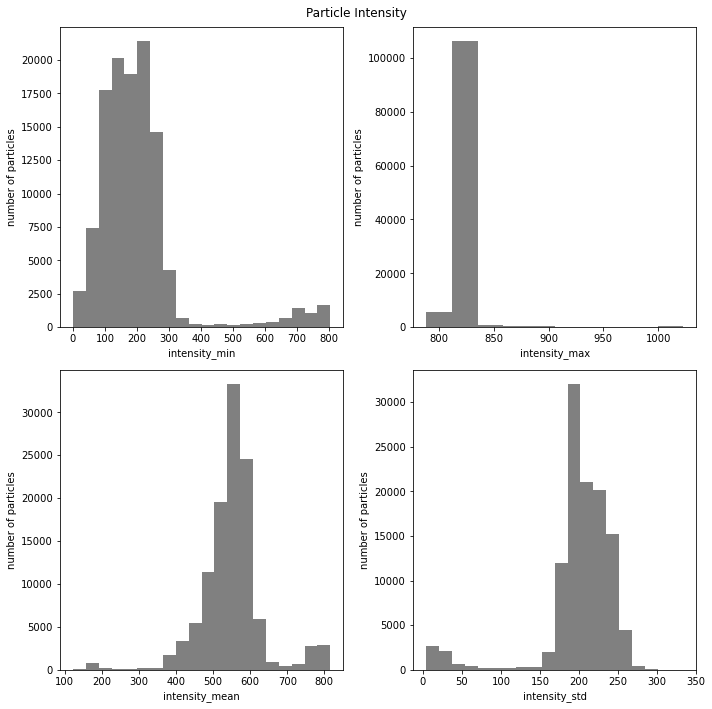

In [115]:
fig = plt.figure(figsize=(10, 10))

axes1 = fig.add_subplot(2, 2, 1) #row, column, which plot
axes2 = fig.add_subplot(2, 2, 2)
axes3 = fig.add_subplot(2, 2, 3)
axes4 = fig.add_subplot(2, 2, 4)

axes1.set_xlabel('intensity_min')
axes1.set_ylabel('number of particles')
axes1.hist(df['intensity_min'], bins = 20, color = "grey")

axes2.set_xlabel('intensity_max')
axes2.set_ylabel('number of particles')
axes2.hist(df['intensity_max'], bins = 10, color = "grey")

axes3.set_xlabel('intensity_mean')
axes3.set_ylabel('number of particles')
axes3.hist(df['intensity_mean'], bins = 20, color = "grey")

axes4.set_xlabel('intensity_std')
axes4.set_ylabel('number of particles')
axes4.hist(df['intensity_std'], bins = 20, color = "grey")

fig.suptitle("Particle Intensity")

fig.tight_layout() #helps clean things up and for the white space 


plt.show()



Text(0, 0.5, 'circularity')

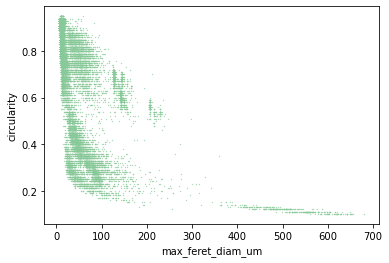

In [116]:
plt.scatter(df['max_feret_diam_um'], df['circularity'], s=0.1, color = '#88c999')

plt.show
plt.xlabel('max_feret_diam_um')
plt.ylabel('circularity')

In [117]:
types=df['type'].unique()
print(types)

['schlieren lines' 'translucent fibral' 'glass' 'dense globular' 'protein'
 'silicone oil' 'multi si oil' 'silicone oil agg.' 'dense fibral'
 'dense ring-like' 'translucent ring-like' 'translucent globular']


In [170]:
#Function to group particle type with amount of data for that particle
from utils import group_particles
#fig=plt.figure(figsize=(10,7))
# ax1=fig.add_subplot(1,1,1)

for x in types:
    group_particles(df,x)

# create a plot, input plot into function, filter data by data type, pass 
# loop through all particle/types defined in array "types"

number of schlieren lines = 1675
number of translucent fibral = 4622
number of glass = 4959
number of dense globular = 41657
number of protein = 367
number of silicone oil = 58169
number of multi si oil = 3085
number of silicone oil agg. = 40
number of dense fibral = 59
number of dense ring-like = 30
number of translucent ring-like = 31
number of translucent globular = 14


In [157]:
'''
grouped_type=df.groupby("type")
schlieren=grouped_type.get_group("schlieren lines")
translucent_fibral=grouped_type.get_group("translucent fibral")
glass=grouped_type.get_group("glass")
dense_glob=grouped_type.get_group("dense globular")
protein=grouped_type.get_group(types[4])
silicone_oil=grouped_type.get_group(types[5])
multi_si_oil=grouped_type.get_group(types[6])
silicone_agg=grouped_type.get_group(types[7])
dense_fibral=grouped_type.get_group(types[8])
dense_ring=grouped_type.get_group(types[9])
translucent_ring=grouped_type.get_group(types[10])
translucent_glob=grouped_type.get_group(types[11])

print("number of schlieren lines =", schlieren.shape[0])
print("number of translucent fibral particles =", translucent_fibral.shape[0])
print("number of glass particles =", glass.shape[0])
print("number of dense globular particles =", dense_glob.shape[0])
print("number of protein particles =", protein.shape[0])
print("number of silicone oil particles =", silicone_oil.shape[0])
print("number of multi silicone oil particles =", multi_si_oil.shape[0])
print("number of silicone aggregated particles =", silicone_agg.shape[0])
print("number of dense fibral particles =", dense_fibral.shape[0])
print("number of dense ring particles =", dense_ring.shape[0])
print("number of translucent ring-like particles =", translucent_ring.shape[0])
print("number of translucent globular particles =", translucent_glob.shape[0])
'''

'\ngrouped_type=df.groupby("type")\nschlieren=grouped_type.get_group("schlieren lines")\ntranslucent_fibral=grouped_type.get_group("translucent fibral")\nglass=grouped_type.get_group("glass")\ndense_glob=grouped_type.get_group("dense globular")\nprotein=grouped_type.get_group(types[4])\nsilicone_oil=grouped_type.get_group(types[5])\nmulti_si_oil=grouped_type.get_group(types[6])\nsilicone_agg=grouped_type.get_group(types[7])\ndense_fibral=grouped_type.get_group(types[8])\ndense_ring=grouped_type.get_group(types[9])\ntranslucent_ring=grouped_type.get_group(types[10])\ntranslucent_glob=grouped_type.get_group(types[11])\n\nprint("number of schlieren lines =", schlieren.shape[0])\nprint("number of translucent fibral particles =", translucent_fibral.shape[0])\nprint("number of glass particles =", glass.shape[0])\nprint("number of dense globular particles =", dense_glob.shape[0])\nprint("number of protein particles =", protein.shape[0])\nprint("number of silicone oil particles =", silicone_oi

['particle_id', 'frame_num', 'particle_num', 'time_stamp_s', 'ecd_um', 'area_pixels', 'perimeter', 'circularity', 'intensity_mean', 'intensity_std', 'intensity_min', 'intensity_max', 'max_feret_diam_um', 'aspect_ratio', 'x_left', 'x_right', 'y_top', 'y_bottom', 'edge_particle', 'experiment', 'step', 'type']


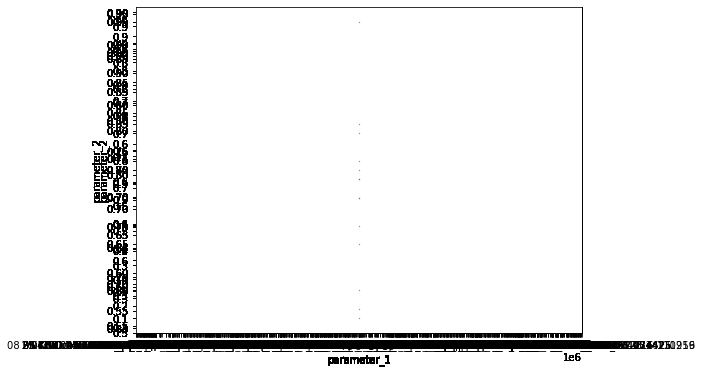

In [173]:
#from utils import make_scatter

fig=plt.figure(figsize=(8,6))

parameters=df.columns.unique()
parameter_list=[]
for parameter in parameters:
    parameter_list.append(parameter)
print(parameter_list)

def make_scatter(fig, df, particle_type, parameter_1, parameter_2):
    type_df=df.loc[df["type"]==particle_type]
    ax1=fig.add_subplot(1,1,1)
    ax1.set_xlabel('parameter_1')
    ax1.set_ylabel('parameter_2')
    ax1.scatter(type_df[parameter_1], type_df[parameter_2], s=0.1, label="particle_type")
# essentially trying to create a parameter list that I can call any parameter into my function as parameter 1 and 2
# then plot the particle type versus those two parameters 
# I want to loop through all the particle types and parameter combinations, if possible, plotting all types on a graph against inputted parameters

for x in types:
    for y in parameter_list:
        make_scatter(fig, df, x, y, "circularity")

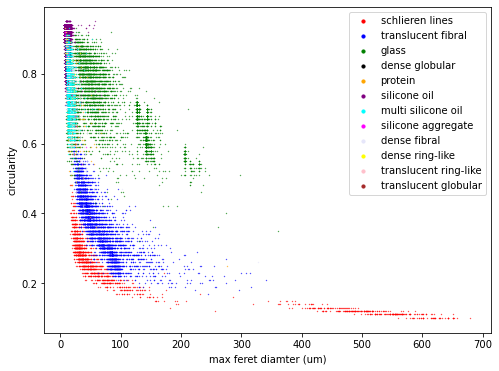

In [172]:

fig=plt.figure(figsize=(8,6))
ax1=fig.add_subplot(1,1,1)

ax1.scatter(schlieren['max_feret_diam_um'], schlieren['circularity'], s=0.1, color = 'r', label="schlieren lines")
ax1.scatter(translucent_fibral['max_feret_diam_um'], translucent_fibral['circularity'], s=0.1, color = 'b', label="translucent fibral")
ax1.scatter(glass['max_feret_diam_um'], glass['circularity'], s=0.1, color = 'g', label="glass")
ax1.scatter(dense_glob['max_feret_diam_um'], dense_glob['circularity'], s=0.1, color = 'k', label="dense globular")
ax1.scatter(protein['max_feret_diam_um'], protein['circularity'], s=0.1, color = 'orange', label="protein")
ax1.scatter(silicone_oil['max_feret_diam_um'], silicone_oil['circularity'], s=0.1, color = 'purple', label="silicone oil")
ax1.scatter(multi_si_oil['max_feret_diam_um'], multi_si_oil['circularity'], s=0.1, color = 'cyan', label="multi silicone oil")
ax1.scatter(silicone_agg['max_feret_diam_um'], silicone_agg['circularity'], s=0.1, color = 'magenta', label="silicone aggregate")
ax1.scatter(dense_fibral['max_feret_diam_um'], dense_fibral['circularity'], s=0.1, color = 'lavender', label="dense fibral")
ax1.scatter(dense_ring['max_feret_diam_um'], dense_ring['circularity'], s=0.1, color = 'yellow', label="dense ring-like")
ax1.scatter(translucent_ring['max_feret_diam_um'], translucent_ring['circularity'], s=0.1, color = 'pink', label="translucent ring-like")
ax1.scatter(translucent_glob['max_feret_diam_um'], translucent_glob['circularity'], s=0.1, color = 'brown', label="translucent globular")


ax1.set_xlabel('max feret diamter (um)')
ax1.set_ylabel('circularity')

legend=plt.legend(markerscale=10)

plt.show()

#comment out particles you don't want to see



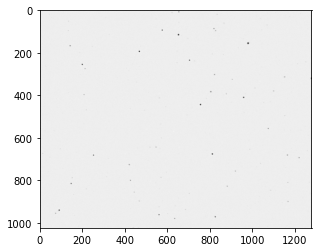

In [122]:
from skimage import io
import skimage.color

# import and read image
img = io.imread("04_Silicon_Oil_Image_00001.jpg")

# display the grayscale image
fig, ax = plt.subplots()
plt.imshow(img, cmap="gray")

In [123]:
#for Lilly's cropping code

x_left=df['x_left']
x_right=df['x_right']
y_top=df['y_top']
y_bottom=df['y_bottom']


string="04 Silicon Oil" #change these for each picture
frame=1 #corresponds to the 00001 or 00003 etc number

#print(np.where(df['frame_num']==1))
idx=np.where((df["step"].str.startswith(string)) & (df["frame_num"]==frame))
index=idx[0]
print(index)

xL=x_left[index]
xR=x_right[index]
yT=y_top[index]
yB=y_bottom[index] #finds your coordinates
print("xL =",xL)

[1681]
xL = 1681    974
Name: x_left, dtype: int64


index in csv= 1682
xL = 974


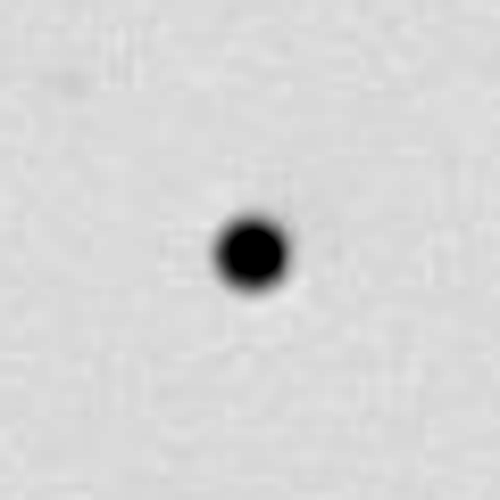

974 984 150 161


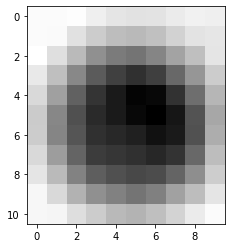

In [124]:
import matplotlib.pyplot as plt

#from PIL import Image
#im = Image.open("04_Silicon_Oil_image_00001.jpg")

                                       
#import imageio.v3 as iio
from skimage import io
import skimage.color
from PIL import Image, ImageEnhance

x_left=df['x_left']
x_right=df['x_right']
y_top=df['y_top']
y_bottom=df['y_bottom']


string="04 Silicon Oil" #change these for each picture
frame=1 #corresponds to the 00001 or 00003 etc number

#print(np.where(df['frame_num']==1))
idx=np.where((df["step"].str.startswith(string)) & (df["frame_num"]==frame)) #tuple
index=idx[0] #array, take first value of tuple
index_val=index[0] #take first value of array
print("index in csv=",index_val+1) #python starts at zero and csv starts at one so off by 1

#row=df[index, axis=1] #pull out entire row at index with largest ecd
#look into .loc and .iloc

xL=x_left[index_val] #
xR=x_right[index_val]
yT=y_top[index_val]
yB=y_bottom[index_val] #finds your coordinates
print("xL =",xL)


img=Image.open("04_Silicon_Oil_Image_00001.jpg")
img2=img.crop((xL-25,yT-25,xR+25,yB+25))
img2=img2.resize((500,500))


#image brightness enhancer
enhancer = ImageEnhance.Contrast(img2)

#factor = 1 #gives original image
#im_output = enhancer.enhance(factor)
#im_output.save('original-image.png')

#factor = 0.5 #decrease constrast
#im_output = enhancer.enhance(factor)
#im_output.save('less-contrast-image.png')

factor = 1.8 #increase contrast
img2_output = enhancer.enhance(factor)

display(img2_output)

# import and read image
img = io.imread("04_Silicon_Oil_Image_00001.jpg")
cropped = img[yT:yB,xL:xR]
#img[img < 128] = 0

# display the grayscale image
fig, ax = plt.subplots()
plt.imshow(cropped, cmap="gray")
print(xL,xR,yT,yB)

In [ ]:
                                       
#import imageio.v3 as iio
from skimage import io
import skimage.color


string="11 Fiber" #change these for each picture
frame=5 #corresponds to the 00001 or 00003 etc number

#print(np.where(df['frame_num']==1))
idx=np.where((df2["step"].str.startswith(string)) & (df2["frame_num"]==frame))
index=idx[0]
print(index)


xL=x_left[3]
xR=x_right[3]
yT=y_top[3]
yB=y_bottom[3] #finds your coordinates

# import and read image
img = io.imread("11 Fiber_5200-3196_191021-10271 Image_00005.jpg")
cropped = img[yT:yB,xL:xR]
#img[img < 128] = 0

# display the grayscale image
fig, ax = plt.subplots()
plt.imshow(cropped, cmap="gray")


In [ ]:
from skimage import io
import skimage.color
from PIL import Image

max_ecd=np.max(df["ecd_um"])
print("ecd =",max_ecd,"microns")
idx=np.where((df["ecd_um"]==max_ecd))  
idx_arr=idx[0]
index=idx_arr[0]
print("csv index =",index+1)

row=df.iloc[index] #pull out entire row at index with largest ecd
#print(row)

ecd=df.iloc[index]['ecd_um']
#print("ecd =",ecd)

ind=96477

xL=df.iloc[ind]['x_left']
xR=df.iloc[ind]['x_right']
yT=df.iloc[ind]['y_top']
yB=df.iloc[ind]['y_bottom']

img=Image.open("09 Glass Image_00299.jpg")
img2=img.crop((xL,yT,xR,yB))
display(img2)

print("largest ecd (glass particle)")

In [ ]:
#largest ecd protein
from skimage import io
import skimage.color
from PIL import Image
import numpy as np

max_ecd=np.max(protein["ecd_um"])
print("ecd =",max_ecd,"microns")
idx=np.where((df["ecd_um"]==max_ecd))  
idx_arr=idx[0]
index=idx_arr[0]
print("csv index =",index+1)

row=df.iloc[index] #pull out entire row at index with largest ecd
#print(row)

ecd=df.iloc[index]['ecd_um']
#print("ecd =",ecd)


xL=df.iloc[index]['x_left']
xR=df.iloc[index]['x_right']
yT=df.iloc[index]['y_top']
yB=df.iloc[index]['y_bottom']

img=Image.open("08_Vial4_Protein_Image_01322.jpg")
img2=img.crop((xL,yT,xR,yB))
display(img2)

print("largest ecd (Protein)")

In [ ]:
#largest ecd dense fibral 

max_ecd=np.max(dense_fibral["ecd_um"])
print("ecd =",max_ecd,"microns")
idx=np.where((df["ecd_um"]==max_ecd) & (df["type"].str.startswith("dense")) & (df["type"].str.endswith("fibral")))
idx_arr=idx[0]
index=idx_arr[0]
print("csv index =",index+1)

row=df.iloc[index] #pull out entire row at index with largest ecd
#print(row)

ecd=df.iloc[index]['ecd_um']
#print("ecd =",ecd)


xL=df.iloc[index]['x_left']
xR=df.iloc[index]['x_right']
yT=df.iloc[index]['y_top']
yB=df.iloc[index]['y_bottom']

img=Image.open("07_Vial3_Dense_Fibral_00111.jpg")
img2=img.crop((xL,yT,xR,yB))
display(img2)

print("largest ecd (Dense Fibral)")

In [ ]:
#largest ecd Schlieren lines

max_ecd=np.max(schlieren["ecd_um"])
print("ecd =",max_ecd,"microns")
idx=np.where((df["ecd_um"]==max_ecd) & (df["type"].str.startswith("schlieren")) & (df["type"].str.endswith("lines")))
idx_arr=idx[0]
index=idx_arr[0]
print("csv index =",index+1)

row=df.iloc[index] #pull out entire row at index with largest ecd
#print(row)

ecd=df.iloc[index]['ecd_um']
#print("ecd =",ecd)


xL=df.iloc[index]['x_left']
xR=df.iloc[index]['x_right']
yT=df.iloc[index]['y_top']
yB=df.iloc[index]['y_bottom']

img=Image.open("25_Shlieren_Lines_Image_00046.jpg")
img2=img.crop((xL,yT,xR,yB))
img2=img2.resize((300,300))
display(img2)

print("largest ecd (Schlieren Lines)")

In [ ]:
#largest dense globular

max_ecd=np.max(dense_glob["ecd_um"])
print("ecd =",max_ecd,"microns")
idx=np.where((df["ecd_um"]==max_ecd) & (df["type"].str.startswith("dense")) & (df["type"].str.endswith("globular")))
idx_arr=idx[0]
index=idx_arr[0]
print("csv index =",index+1)

row=df.iloc[index] #pull out entire row at index with largest ecd
#print(row)

ecd=df.iloc[index]['ecd_um']
#print("ecd =",ecd)


xL=df.iloc[index]['x_left']
xR=df.iloc[index]['x_right']
yT=df.iloc[index]['y_top']
yB=df.iloc[index]['y_bottom']

img=Image.open("06_Vial2_Dense_Globular_00565.jpg")
img2=img.crop((xL,yT,xR,yB))
img2=img2.resize((300,300))
display(img2)

print("largest ecd (Desnse Globular)")

In [ ]:
#largest multi si oil

max_ecd=np.max(multi_si_oil["ecd_um"])
print("ecd =",max_ecd,"microns")
idx=np.where((df["ecd_um"]==max_ecd) & (df["type"].str.startswith("multi")) & (df["type"].str.endswith("oil")))
idx_arr=idx[0]
index=idx_arr[0]
print("csv index =",index+1)

row=df.iloc[index] #pull out entire row at index with largest ecd
#print(row)

ecd=df.iloc[index]['ecd_um']
#print("ecd =",ecd)


xL=df.iloc[index]['x_left']
xR=df.iloc[index]['x_right']
yT=df.iloc[index]['y_top']
yB=df.iloc[index]['y_bottom']

img=Image.open("07_Multi_Silicone_Oil_Image_01036.jpg")
img2=img.crop((xL,yT,xR,yB))
img2=img2.resize((300,300))
display(img2)

print("largest ecd (Multi Silicone Oil)")

In [ ]:
#largest silicone oil agg

max_ecd=np.max(silicone_agg["ecd_um"])
print("ecd =",max_ecd,"microns")
idx=np.where((df["ecd_um"]==max_ecd) & (df["type"].str.startswith("silicone")) & (df["type"].str.endswith("agg.")))
idx_arr=idx[0]
index=idx_arr[0]
print("csv index =",index+1)

row=df.iloc[index] #pull out entire row at index with largest ecd
#print(row)

ecd=df.iloc[index]['ecd_um']
#print("ecd =",ecd)


xL=df.iloc[index]['x_left']
xR=df.iloc[index]['x_right']
yT=df.iloc[index]['y_top']
yB=df.iloc[index]['y_bottom']

img=Image.open("07_Silicone_Oil_Agg_Image_00798.jpg")
img2=img.crop((xL,yT,xR,yB))
img2=img2.resize((300,300))
display(img2)

print("largest ecd (Silicone Oil Agg.)")

In [ ]:
#largest Dense ring-like
max_ecd=np.max(dense_ring["ecd_um"])
print("ecd =",max_ecd,"microns")
idx=np.where((df["ecd_um"]==max_ecd) & (df["type"].str.startswith("dense")) & (df["type"].str.endswith("ring-like")))
idx_arr=idx[0]
index=idx_arr[0]
print("csv index =",index+1)

row=df.iloc[index] #pull out entire row at index with largest ecd
#print(row)

ecd=df.iloc[index]['ecd_um']
#print("ecd =",ecd)


xL=df.iloc[index]['x_left']
xR=df.iloc[index]['x_right']
yT=df.iloc[index]['y_top']
yB=df.iloc[index]['y_bottom']

img=Image.open("07_Dense_Ring-Like_Image_00099.jpg")
img2=img.crop((xL,yT,xR,yB))
img2=img2.resize((300,300))
display(img2)

print("largest ecd (Dense ring-like)")

In [ ]:
#largest Traslucent Fibral

max_ecd=np.max(translucent_fibral["ecd_um"])
print("ecd =",max_ecd,"microns")
idx=np.where((df["ecd_um"]==max_ecd) & (df["type"].str.startswith("trans")) & (df["type"].str.endswith("fibral")))
idx_arr=idx[0]
index=idx_arr[0]
print("csv index =",index+1)

row=df.iloc[index] #pull out entire row at index with largest ecd
#print(row)

ecd=df.iloc[index]['ecd_um']
#print("ecd =",ecd)


xL=df.iloc[index]['x_left']
xR=df.iloc[index]['x_right']
yT=df.iloc[index]['y_top']
yB=df.iloc[index]['y_bottom']

img=Image.open("07_Vial3_Translucent_Fibral_01986.jpg")
img2=img.crop((xL,yT,xR,yB))
img2=img2.resize((300,300))
display(img2)

print("largest ecd (Translucent Fibral)")

In [ ]:
'''
from PIL import Image

#img = Image.open(path)	
# On successful execution of this statement, an object of Image type is returned and stored in img variable)
im = Image.open('withmed.jpg')
im.show('image',img)

filename = ""
with Image.open(filename) as image:
	width, height = image.size
#Image.size gives a 2-tuple and the width, height can be obtained

df = pd.read_csv('KBI Image')
ImageFolder = KBI Image
ProteinImages = []
SchlerenImages = []
AirbubbleImages = []
FiberImages = []
Other = []

for filename in ImageFolder:
    if filename.startswith('Protein'):
        ProteinImages.append(filename)
    elif filename.startswith('Schleren'):
        SchlerenImages.append(filename)
    elif filename.startswith('0')
        SiliconImages.append(filename)
    elif filename.startswith('Air')
        AirbubbleImages.append(filename)
    elif filename.startswith('fiber')
        FiberImages.append(filename)
    else:
        other.append(filename)
'''

In [ ]:
fig = plt.figure(figsize=(20, 40))

axes1 = fig.add_subplot(6, 2, 1) #row, column, which plot
axes2 = fig.add_subplot(6, 2, 2)
axes3 = fig.add_subplot(6, 2, 3)
axes4 = fig.add_subplot(6, 2, 4)
axes5 = fig.add_subplot(6, 2, 5)
axes6 = fig.add_subplot(6, 2, 6)
axes7 = fig.add_subplot(6, 2, 7)
axes8 = fig.add_subplot(6, 2, 8)
axes9 = fig.add_subplot(6, 2, 9)
axes10 = fig.add_subplot(6, 2, 10)
axes11 = fig.add_subplot(6, 2, 11)
axes12 = fig.add_subplot(6, 2, 12)



axes1.set_xlabel('ecd um')
axes1.set_ylabel('schlieren particle')
axes1.hist(schlieren['ecd_um'], bins = 20, color = "violet")

axes2.set_xlabel('ecd um')
axes2.set_ylabel('translucent fibral')
axes2.hist(translucent_fibral['ecd_um'], bins = 20, color = "lightpink")

axes3.set_xlabel('ecd um')
axes3.set_ylabel('glass')
axes3.hist(glass['ecd_um'], bins = 20, color = "cyan")

axes4.set_xlabel('ecd um')
axes4.set_ylabel('Dense Globular')
axes4.hist(dense_glob['ecd_um'], bins = 20, color = "bisque")

axes5.set_xlabel('ecd um')
axes5.set_ylabel('Protein')
axes5.hist(protein['ecd_um'], bins = 20, color = "yellow")

axes6.set_xlabel('ecd um')
axes6.set_ylabel('silicone oil')
axes6.hist(silicone_oil['ecd_um'], bins = 20, color = "cornflowerblue")

axes7.set_xlabel('ecd um')
axes7.set_ylabel('Multi Si Oil')
axes7.hist(multi_si_oil['ecd_um'], bins = 20, color = "plum")

axes8.set_xlabel('ecd um')
axes8.set_ylabel('Silicone Agg')
axes8.hist(silicone_agg['ecd_um'], bins = 20, color = "lightgreen")

axes9.set_xlabel('ecd um')
axes9.set_ylabel('Dense Fibral')
axes9.hist(dense_fibral['ecd_um'], bins = 20, color = "lightcoral")

axes10.set_xlabel('ecd um')
axes10.set_ylabel('Dense Ring')
axes10.hist(dense_ring['ecd_um'], bins = 20, color = "deepskyblue")

axes11.set_xlabel('ecd um')
axes11.set_ylabel('Translucent Ring')
axes11.hist(translucent_ring['ecd_um'], bins = 20, color = "lavender")

axes12.set_xlabel('ecd um')
axes12.set_ylabel('Translucent Glob')
axes12.hist(translucent_glob['ecd_um'], bins = 20, color = "greenyellow")

axes1.title.set_text('Schlieren ecd')
axes2.title.set_text('Translucent Fibral')
axes3.title.set_text('Glass')
axes4.title.set_text('Dense Globular')
axes5.title.set_text('Protein')
axes6.title.set_text('Silicone Oil')
axes7.title.set_text('Multi Silicone Oil')
axes8.title.set_text('Silicon Oil Agg')
axes9.title.set_text('Dense Fibral')
axes10.title.set_text('Dense Ring Like')
axes11.title.set_text('Translucent Ring-Like')
axes12.title.set_text('Translucent Globuar ')

fig.tight_layout() #helps clean things up and for the white space 

plt.show()

In [ ]:

n_bins = 40
plt.xlabel('circularity')
plt.ylabel('number of particles')
plt.title('Circularity Particle Distribution')

plt.hist(schlieren['circularity'], n_bins, color = 'r', label="schlieren")
plt.hist(translucent_fibral['circularity'], n_bins, color = 'b', label="translucent fibral")
plt.hist(glass['circularity'], n_bins, color = 'g', label="glass")
plt.hist(dense_glob['circularity'], n_bins, color = 'k', label="dense glob")
plt.hist(protein['circularity'], n_bins, color = 'orange', label="protein")
plt.hist(silicone_oil['circularity'], n_bins, color = 'purple', label="silicone oil")
plt.hist(multi_si_oil['circularity'], n_bins, color = 'cyan', label="multi silicone oil")
plt.hist(silicone_agg['circularity'], n_bins, color = 'magenta', label="silicone aggregate")
plt.hist(dense_fibral['circularity'], n_bins, color = 'lavender', label="dense fibral")
plt.hist(dense_ring['circularity'], n_bins, color = 'yellow', label="dense ring")
plt.hist(translucent_ring['circularity'], n_bins, color = 'pink', label="translucent ring")
plt.hist(translucent_glob['circularity'], n_bins, color = 'brown', label="translucent glob")

plt.legend()


In [ ]:
fig=plt.figure(figsize=(20,40))
ax1=fig.add_subplot(3,2,1)
ax2=fig.add_subplot(3,2,2)
ax3=fig.add_subplot(3,2,3)
ax4=fig.add_subplot(3,2,4)
ax5=fig.add_subplot(3,2,5)
# ax6=fig.add_subplot(3,2,6)

n_bins = 40

ax1.set_title('Circularity Particle Distribution')
ax1.set_xlabel('circularity')
ax1.set_ylabel('number of particles')
ax1.hist(schlieren['circularity'], n_bins, color = 'r', label="schlieren")
ax1.hist(translucent_fibral['circularity'], n_bins, color = 'b', label="translucent fibral")
ax1.hist(glass['circularity'], n_bins, color = 'g', label="glass")
ax1.hist(dense_glob['circularity'], n_bins, color = 'k', label="dense glob")
ax1.hist(protein['circularity'], n_bins, color = 'orange', label="protein")
ax1.hist(silicone_oil['circularity'], n_bins, color = 'purple', label="silicone oil")
ax1.hist(multi_si_oil['circularity'], n_bins, color = 'cyan', label="multi silicone oil")
ax1.hist(silicone_agg['circularity'], n_bins, color = 'magenta', label="silicone aggregate")
ax1.hist(dense_fibral['circularity'], n_bins, color = 'lavender', label="dense fibral")
ax1.hist(dense_ring['circularity'], n_bins, color = 'yellow', label="dense ring")
ax1.hist(translucent_ring['circularity'], n_bins, color = 'pink', label="translucent ring")
ax1.hist(translucent_glob['circularity'], n_bins, color = 'brown', label="translucent glob")

ax2.set_title('Mean Intensity Particle Distribution')
ax2.set_xlabel('intensity_mean')
ax2.set_ylabel('number of particles')
ax2.hist(schlieren['intensity_mean'], n_bins, color = 'r', label="schlieren")
ax2.hist(translucent_fibral['intensity_mean'], n_bins, color = 'b', label="translucent fibral")
ax2.hist(glass['intensity_mean'], n_bins, color = 'g', label="glass")
ax2.hist(dense_glob['intensity_mean'], n_bins, color = 'k', label="dense glob")
ax2.hist(protein['intensity_mean'], n_bins, color = 'orange', label="protein")
ax2.hist(silicone_oil['intensity_mean'], n_bins, color = 'purple', label="silicone oil")
ax2.hist(multi_si_oil['intensity_mean'], n_bins, color = 'cyan', label="multi silicone oil")
ax2.hist(silicone_agg['intensity_mean'], n_bins, color = 'magenta', label="silicone aggregate")
ax2.hist(dense_fibral['intensity_mean'], n_bins, color = 'lavender', label="dense fibral")
ax2.hist(dense_ring['intensity_mean'], n_bins, color = 'yellow', label="dense ring")
ax2.hist(translucent_ring['intensity_mean'], n_bins, color = 'pink', label="translucent ring")
ax2.hist(translucent_glob['intensity_mean'], n_bins, color = 'brown', label="translucent glob")

ax3.set_title('Perimeter Particle Distribution')
ax3.set_xlabel('perimeter')
ax3.set_ylabel('number of particles')
ax3.hist(schlieren['perimeter'], n_bins, color = 'r', label="schlieren")
ax3.hist(translucent_fibral['perimeter'], n_bins, color = 'b', label="translucent fibral")
ax3.hist(glass['perimeter'], n_bins, color = 'g', label="glass")
ax3.hist(dense_glob['perimeter'], n_bins, color = 'k', label="dense glob")
ax3.hist(protein['perimeter'], n_bins, color = 'orange', label="protein")
ax3.hist(silicone_oil['perimeter'], n_bins, color = 'purple', label="silicone oil")
ax3.hist(multi_si_oil['perimeter'], n_bins, color = 'cyan', label="multi silicone oil")
ax3.hist(silicone_agg['perimeter'], n_bins, color = 'magenta', label="silicone aggregate")
ax3.hist(dense_fibral['perimeter'], n_bins, color = 'lavender', label="dense fibral")
ax3.hist(dense_ring['perimeter'], n_bins, color = 'yellow', label="dense ring")
ax3.hist(translucent_ring['perimeter'], n_bins, color = 'pink', label="translucent ring")
ax3.hist(translucent_glob['perimeter'], n_bins, color = 'brown', label="translucent glob")

ax4.set_title('Max Feret Diameter Particle Distribution')
ax4.set_xlabel('Max Feret Diameter')
ax4.set_ylabel('number of particles')
ax4.hist(schlieren['max_feret_diam_um'], n_bins, color = 'r', label="schlieren")
ax4.hist(translucent_fibral['max_feret_diam_um'], n_bins, color = 'b', label="translucent fibral")
ax4.hist(glass['max_feret_diam_um'], n_bins, color = 'g', label="glass")
ax4.hist(dense_glob['max_feret_diam_um'], n_bins, color = 'k', label="dense glob")
ax4.hist(protein['max_feret_diam_um'], n_bins, color = 'orange', label="protein")

# ax4.hist(silicone_oil['max_feret_diam_um'], n_bins, color = 'purple', label="silicone oil")
ax4.hist(multi_si_oil['max_feret_diam_um'], n_bins, color = 'cyan', label="multi silicone oil")
ax4.hist(silicone_agg['max_feret_diam_um'], n_bins, color = 'magenta', label="silicone aggregate")
ax4.hist(dense_fibral['max_feret_diam_um'], n_bins, color = 'lavender', label="dense fibral")
# ax4.hist(dense_ring['max_feret_diam_um'], n_bins, color = 'yellow', label="dense ring")
ax4.hist(translucent_ring['max_feret_diam_um'], n_bins, color = 'pink', label="translucent ring")
ax4.hist(translucent_glob['max_feret_diam_um'], n_bins, color = 'brown', label="translucent glob")

ax5.set_title('Area of Pixels Particle Distribution')
ax5.set_xlabel('area pixels')
ax5.set_ylabel('number of particles')
ax5.hist(schlieren['area_pixels'], n_bins, color = 'r', label="schlieren")
ax5.hist(translucent_fibral['area_pixels'], n_bins, color = 'b', label="translucent fibral")
ax5.hist(glass['area_pixels'], n_bins, color = 'g', label="glass")
ax5.hist(dense_glob['area_pixels'], n_bins, color = 'k', label="dense glob")
ax5.hist(protein['area_pixels'], n_bins, color = 'orange', label="protein")
ax5.hist(silicone_oil['area_pixels'], n_bins, color = 'purple', label="silicone oil")
ax5.hist(multi_si_oil['area_pixels'], n_bins, color = 'cyan', label="multi silicone oil")
ax5.hist(silicone_agg['area_pixels'], n_bins, color = 'magenta', label="silicone aggregate")
ax5.hist(dense_fibral['area_pixels'], n_bins, color = 'lavender', label="dense fibral")
ax5.hist(dense_ring['area_pixels'], n_bins, color = 'yellow', label="dense ring")
ax5.hist(translucent_ring['area_pixels'], n_bins, color = 'pink', label="translucent ring")
ax5.hist(translucent_glob['area_pixels'], n_bins, color = 'brown', label="translucent glob")


['particle_id', 'frame_num', 'particle_num', 'time_stamp_s', 'ecd_um', 'area_pixels', 'perimeter', 'circularity', 'intensity_mean', 'intensity_std', 'intensity_min', 'intensity_max', 'max_feret_diam_um', 'aspect_ratio', 'x_left', 'x_right', 'y_top', 'y_bottom', 'edge_particle', 'experiment', 'step', 'type']


KeyError: 'parameter'

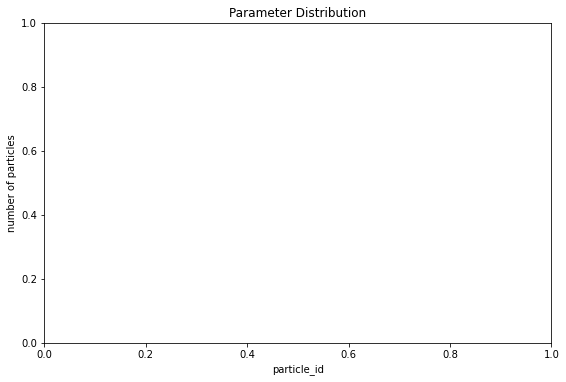

In [153]:
# Histogram Plotting Function
fig=plt.figure(figsize=(20,20))
n_bins=30
parameters=df.columns.unique()
parameter_list=[]

for parameter in parameters:
    parameter_list.append(parameter)
print(parameter_list)

def make_histogram(fig, df, particle_type, parameter):
    ax1=fig.add_subplot(3,2,1)
    ax1.set_title('Parameter Distribution') # how to call parameter and write distribution after 
    ax1.set_xlabel(parameter)
    ax1.set_ylabel('number of particles')
    type_df=df.loc[df["type"]==particle_type]
    return ax1.hist(type_df["parameter"], n_bins, label="type") #how to make random colors 

for x in types:
    for y in parameter_list:
        make_histogram(fig, df, x, y)


# ax1.hist(schlieren['circularity'], n_bins, color = 'r', label="schlieren")
# protein = ['dense globular', 'dense fibral',
   #	'translucent ring-like', 'dense ring-like', 'translucent fibral',
  # 	'translucent globular']

In [103]:
type_df=df.loc[df["type"]=="silicone oil"]
type_df['type'].unique()

array(['silicone oil'], dtype=object)